In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Bacterial Production Calculation from DPM1

The following steps summarize the calculation of bacterial leucine incorporation rates from QuantaSmart DPM data.

---

### 1. Net DPM

$$\text{Net DPM} = \max(\text{DPM1}_{\text{sample}} - \text{DPM}_{\text{blank}}, 0)$$

---

### 2. Convert DPM to Becquerel (Bq)

$$\text{Activity (Bq)} = \frac{\text{Net DPM}}{60}$$

*Note: 1 DPM = 1/60 Bq.*

---

### 3. Specific Activity

Given the radioactive leucine added per sample $(A_{\text{sample}})$ in Bq, and the moles of leucine added $(n_{\text{Leu}})$ in mol:

$$\text{Specific Activity (Bq/mol)} = \frac{A_{\text{sample}}}{n_{\text{Leu}}}$$

Convert to Ci/mmol:

$$\text{Specific Activity (Ci/mmol)} = \frac{\text{Specific Activity (Bq/mol)}}{3.7 \times 10^{10}} \times 10^{-3}$$

---

### 4. Moles of Leucine Incorporated

$$ n_{\text{incorporated}} = \frac{\text{Activity (Bq)}}{\text{Specific Activity (Bq/mol)}}$$

---

### 5. Convert to pmol

$$ \text{pmol Leucine} = n_{\text{incorporated}} \times 10^{12} $$ 

---

### 6. Normalize by Incubation Time and Sample Volume

$$ \text{Production rate (pmol h}^{-1} \text{ mL}^{-1}) = \frac{\text{pmol Leucine}}{\text{Incubation Time (h)} \times \text{Sample Volume (mL)}} $$

---

### 7. DPM1 Calculation from CPMA, CPMB, and tSIE (if missing)

1. Efficiency from control samples:

$$ {Efficiency}_{\text{control}} = \frac{\text{CPMA} + \text{CPMB}}{\text{DPM1}_{\text{control}}} $$

2. Interpolate efficiency for all samples:

$$ \text{Efficiency}_{\text{sample}} = \text{interp}(\text{tSIE}_{\text{sample}}, \text{tSIE}_{\text{control}}, \text{Efficiency}_{\text{control}})$$

3. Calculate missing DPM1:

$$ \text{DPM1}_{\text{sample}} = \frac{\text{CPMA} + \text{CPMB}}{\text{Efficiency}_{\text{sample}}}$$

---

### References

1. Kirchman, D. L. (1993). *Leucine incorporation as a measure of biomass production by heterotrophic bacteria.* Handbook of Methods in Aquatic Microbial Ecology. CRC Press.
2. Simon, M., & Azam, F. (1989). Protein content and protein synthesis rates of planktonic marine bacteria. *Marine Ecology Progress Series*, 51, 201–213.
3. Riemann, L., & Azam, F. (2002). Widespread use of the [^3H]-leucine incorporation technique for measuring bacterial production.



In [3]:
# Python code to calculate missing DPM1 from CPMA, CPMB, and tSIE.
# Values for the DPM1 was missing due to an assumed to high amount in the biofloc value. 

# Results
# 
Samples = ['B1-A', 'B1-A', 'B1-A', 'B2-A', 'B2-A', 'B2-A', 'B4-A', 'B4-A', 'B4-A',
           'B1-D', 'B1-D', 'B1-D', 'B2-D', 'B2-D', 'B2-D', 'B4-D', 'B4-D', 'B4-D',
           'B1-S', 'B1-S', 'B1-S', 'B2-S', 'B2-S', 'B2-S', 'B4-S', 'B4-S', 'B4-S',
           'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3']

CPMA = np.array([512309, 600412, 593206, 580797, 677375, 604853, 651844, 436875, 452706,
                 689687, 643259, 579347, 643509, 624109, 593316, 570459, 583241, 624844,
                 527675, 615537, 485737, 514191, 517894, 489969, 429626, 433941, 469403,
                 74737, 78487, 80409, 29698, 30429, 31341, 31176, 24983, 20589])

CPMB = np.array([352166, 412309, 407444, 412119, 480303, 420325, 474147, 301812, 313275,
                 480237, 438647, 402237, 452609, 438062, 408194, 404903, 423816, 456178,
                 356756, 410319, 320512, 357444, 360525, 332069, 295944, 304484, 33841,
                 52000, 55141, 57062, 20304, 21076, 21547, 21867, 17672, 14292])

DPM1 = np.array([np.nan]*27 + [185011, 201731, 203418, 77270, 78102, 80916, 79807, 63990, 54642])

tSIE = np.array([312.88, 309.46, 308.43, 329.53, 341.58, 304.67, 360.22, 311.46, 312.25,
                 322.17, 296.12, 316.42, 321.89, 322.16, 318.43, 323.01, 378.70, 366.39,
                 291.74, 291.44, 282.00, 321.85, 314.80, 296.62, 309.44, 323.90, 376.08,
                 345.21, 328.88, 335.12, 324.15, 329.43, 327.14, 330.45, 330.24, 316.58])

# Define indices of control samples (where DPM1 is valid)
control_idx = np.where(~np.isnan(DPM1))[0]

# Compute efficiencies for control samples
control_eff = (CPMA[control_idx] + CPMB[control_idx]) / DPM1[control_idx]
control_tSIE = tSIE[control_idx]

# Interpolate efficiencies for all samples based on tSIE
all_eff = np.interp(tSIE, control_tSIE, control_eff)

# Calculate DPM1 for all samples (replace NaN with calculated values)
DPM1_filled = (CPMA + CPMB) / all_eff

# Replace original DPM1 NaNs with calculated values
DPM1_complete = np.where(np.isnan(DPM1), DPM1_filled, DPM1)

# Print results
print_stop = None
if print_stop is True:
    for s, d in zip(Samples, DPM1_complete):
        print(f'{s}: {d:.0f}')


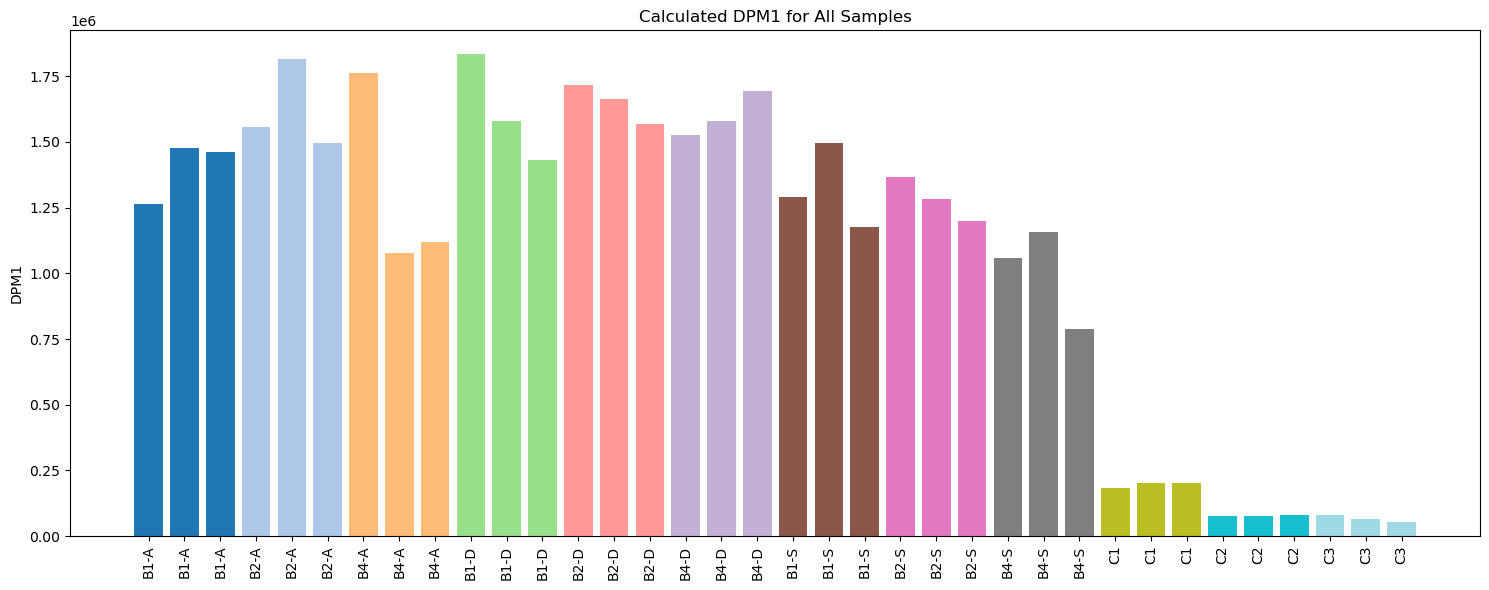

In [4]:
# Assign colors by sample type (e.g., B1, B2, B4, C1, C2, C3, etc.)
unique_samples = list(sorted(set(Samples), key=Samples.index))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_samples)))
color_dict = {s: colors[i] for i, s in enumerate(unique_samples)}


# Create a bar plot
plt.figure(figsize=(15, 6))
bar_colors = [color_dict[s] for s in Samples]
plt.bar(range(len(Samples)), DPM1_complete, color=bar_colors)


plt.xticks(range(len(Samples)), Samples, rotation=90)
plt.ylabel('DPM1')
plt.title('Calculated DPM1 for All Samples')
plt.tight_layout()
plt.show()


In [5]:
# Function to calculate bacterial production per mL of sample water using DPM1, count time, and sample volume

def calculate_production_per_mL(
    DPM1_array, dpm_blank, incubation_times, sample_volumes_mL, specific_activity_Ci_per_mmol
):
    """
    Calculate bacterial production (pmol Leucine h^-1 mL^-1 water) for an array of samples.

    Parameters
    ----------
    DPM1_array : array-like
        DPM1 values for all samples.
    dpm_blank : float
        Blank DPM to subtract from each sample.
    incubation_times : array-like
        Incubation time in hours for each sample.
    sample_volumes_mL : array-like
        Volume of water in mL for each sample.
    specific_activity_Ci_per_mmol : float
        Specific activity of tracer (Ci/mmol).

    Returns
    -------
    production_array : np.ndarray
        Calculated production for each sample in pmol Leucine h^-1 mL^-1 water.
    """
    DPM1_array = np.array(DPM1_array)
    incubation_times = np.array(incubation_times)
    sample_volumes_mL = np.array(sample_volumes_mL)

    # Net DPM
    net_dpm = np.maximum(DPM1_array - dpm_blank, 0)

    # Convert DPM -> Bq
    activity_bq = net_dpm / 60.0

    # Convert specific activity to Bq per mol
    CI_TO_BQ = 3.7e10  # 1 Ci = 3.7e10 Bq
    specific_activity_bq_per_mol = specific_activity_Ci_per_mmol * 1e-3 * CI_TO_BQ

    # Moles of leucine incorporated
    mol_leu = activity_bq / specific_activity_bq_per_mol

    # Convert to pmol and normalize per incubation time and sample volume
    pmol_leu = mol_leu * 1e12
    production_array = pmol_leu / (incubation_times * sample_volumes_mL)

    return production_array


In [6]:
# Ddifference between 747 and 629 minutes converted to hours
inc_time = [ (747 - 629)/60 ] * 36 # same incubation time for all 36 samples in hours


# Sample volumes for all 36 samples (1.5 mL each)
volume_ml = [1.5] * 36

volume_bf_ratio = [1,1,1,0.5,0.5,0.5,0.25,0.25,0.25,
                   1,1,1,0.5,0.5,0.5,0.25,0.25,0.25,
                   1,1,1,0.5,0.5,0.5,0.25,0.25,0.25,
                   1,1,1,1,1,1,1,1,1]

# Specific activity calculations
activity_MBq = 0.074          # MBq of 3H-leucine added per sample
V_L = 2e-6                    # 2 μL in liters
C_radio_M = 1e-3               

# Convert activity to Bq
activity_Bq = activity_MBq * 1e6

# Moles of leucine added
moles_leucine_added = C_radio_M * V_L

# Specific activity
specific_activity_Bq_per_mol = activity_Bq / moles_leucine_added

# Convert to Ci/mmol
CI_TO_BQ = 3.7e10
specific_activity_Ci_per_mmol = specific_activity_Bq_per_mol / CI_TO_BQ * 1e-3



Production_rate_mL = calculate_production_per_mL(DPM1_complete, 0, inc_time, volume_ml, specific_activity_Ci_per_mmol)

In [7]:
# Convert Leusine incorporation (pmol h^-1 mL^-1) to Bacterial Carbon Production (µg C L^-1 h^-1)
def leucine_to_bacterial_carbon(leu_pmol_mL_h):
    MW_Leu = 131.17  # g/mol
    f_L = 0.073      # fraction of leucine in protein
    prot_to_C = 0.86 # protein to carbon conversion
    leu_pmol_L_h = leu_pmol_mL_h * 1000  # pmol/mL -> pmol/L
    bcarb_ugC_L_h = leu_pmol_L_h * MW_Leu * 1e-12 / f_L * prot_to_C
    return bcarb_ugC_L_h

# Example usage:
Bacterial_C_production = leucine_to_bacterial_carbon(Production_rate_mL)

In [8]:
# Create a DataFrame summarizing all relevant values for each sample

data = {
'Sample': Samples,
'CPMA': CPMA,
'CPMB': CPMB,
'DPM1': DPM1_complete,
'Incubation_time_h': inc_time,
'Volume_mL': volume_ml,
'Volume_biofloc_ratio': volume_bf_ratio,
'Production_pmol_h_per_mL': Production_rate_mL,
'Bacterial_C_production': Bacterial_C_production, 
}

df = pd.DataFrame(data)

print(df.head())

# Save DataFrame to CSV
df.to_csv('production.csv', index=False)

  Sample    CPMA    CPMB          DPM1  Incubation_time_h  Volume_mL  \
0   B1-A  512309  352166  1.261963e+06           1.966667        1.5   
1   B1-A  600412  412309  1.478373e+06           1.966667        1.5   
2   B1-A  593206  407444  1.460751e+06           1.966667        1.5   
3   B2-A  580797  412119  1.555429e+06           1.966667        1.5   
4   B2-A  677375  480303  1.813533e+06           1.966667        1.5   

   Volume_biofloc_ratio  Production_pmol_h_per_mL  Bacterial_C_production  
0                   1.0              1.926955e+08              297.770510  
1                   1.0              2.257402e+08              348.834205  
2                   1.0              2.230495e+08              344.676319  
3                   0.5              2.375063e+08              367.016245  
4                   0.5              2.769175e+08              427.918004  


In [9]:
# Kirchman, D. L. (1993). Leucine incorporation as a measure of biomass production by heterotrophic bacteria. Handbook of Methods in Aquatic Microbial Ecology. CRC Press.
# Simon, M., & Azam, F. (1989). Marine Ecology Progress Series, 51, 201–213.

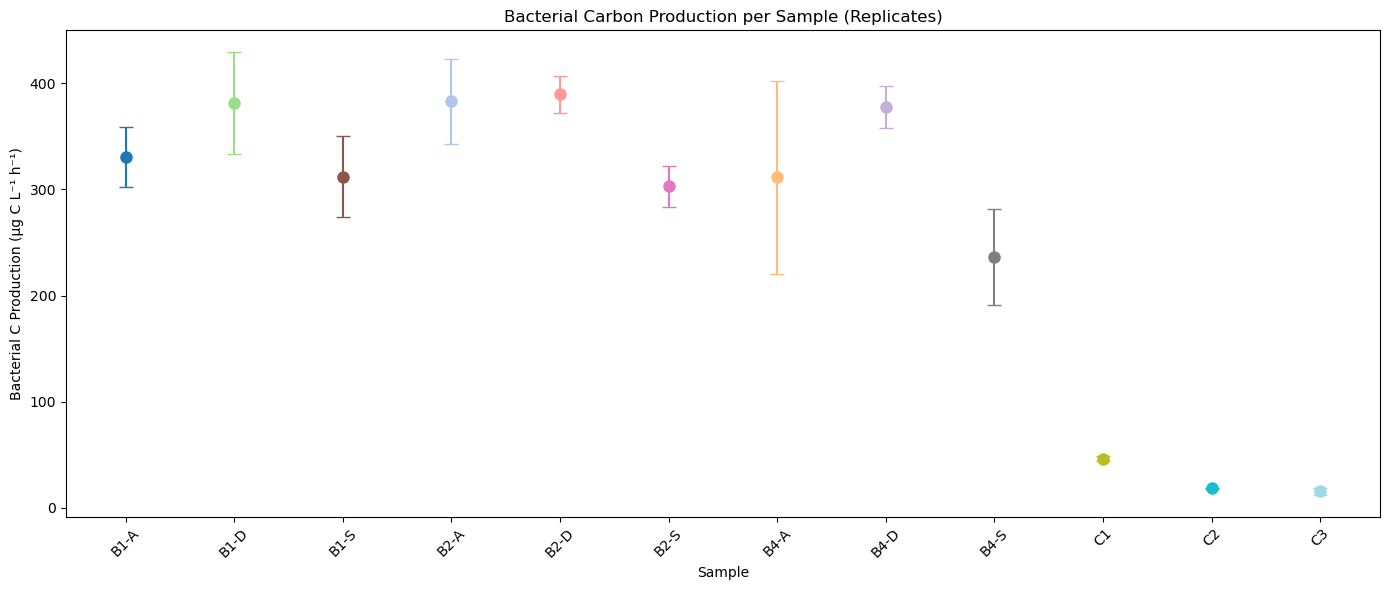


Average ± SD per Sample:
B1-A: 330.43 ± 28.36
B1-D: 381.07 ± 47.73
B1-S: 311.91 ± 38.34
B2-A: 382.69 ± 39.78
B2-D: 389.32 ± 17.72
B2-S: 302.64 ± 19.52
B4-A: 311.50 ± 90.80
B4-D: 377.45 ± 20.04
B4-S: 236.30 ± 45.04
C1: 46.42 ± 2.40
C2: 18.58 ± 0.45
C3: 15.61 ± 3.00





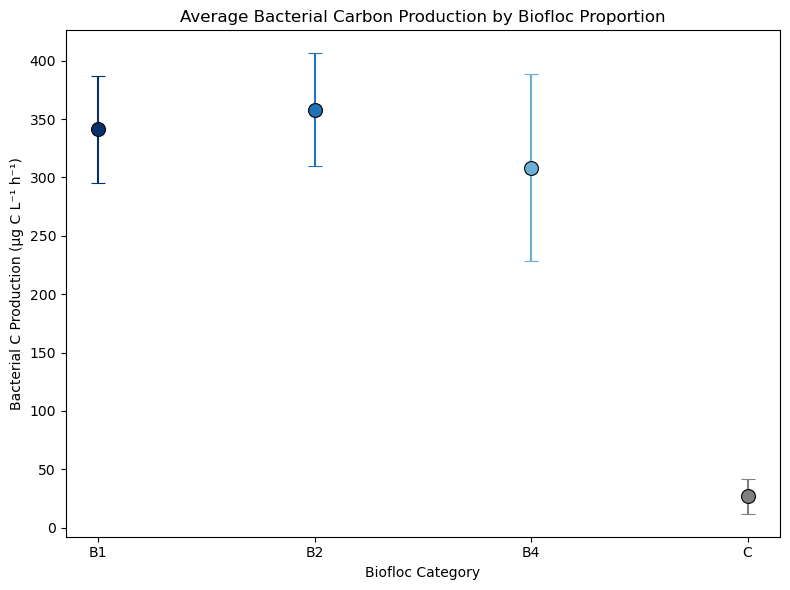


Average ± SD per Biofloc Category:
B1: 341.14 ± 45.82
B2: 358.22 ± 48.12
B4: 308.41 ± 80.06
C: 26.87 ± 14.84


In [23]:
# Group by unique sample name to calculate mean and std of Bacterial_C_production
grouped = df.groupby('Sample')['Bacterial_C_production'].agg(['mean','std']).reset_index()

# Assuming df already exists as per your previous code
# Create a column for biofloc group: B1, B2, B4, C
df['Biofloc_Group'] = df['Sample'].str.extract(r'(B\d|C\d)')[0]  # extract B1, B2, B4, C1, C2, C3

# Map to broader categories for grouping
df['Biofloc_Category'] = df['Biofloc_Group'].replace({
    'B1-A':'B1', 'B1-D':'B1', 'B1-S':'B1',
    'B2-A':'B2', 'B2-D':'B2', 'B2-S':'B2',
    'B4-A':'B4', 'B4-D':'B4', 'B4-S':'B4',
    'C1':'C', 'C2':'C', 'C3':'C'
})


# --- Plot 1: Individual samples with error bars ---
grouped_samples = df.groupby('Sample')['Bacterial_C_production'].agg(['mean','std']).reset_index()

plt.figure(figsize=(14,6))
for i, row in grouped_samples.iterrows():
    sample = row['Sample']
    mean = row['mean']
    std = row['std']
    plt.errorbar(sample, mean, yerr=std, 
                 fmt='o', markersize=8, capsize=5, linestyle='None', 
                 color=color_dict[sample]) 

plt.xticks(rotation=45)
plt.ylabel('Bacterial C Production (µg C L⁻¹ h⁻¹)')
plt.xlabel('Sample')
plt.title('Bacterial Carbon Production per Sample (Replicates)')
plt.tight_layout()
plt.show()


# Print averages after the plot
print("\nAverage ± SD per Sample:")
for _, row in grouped_samples.iterrows():
    print(f"{row['Sample']}: {row['mean']:.2f} ± {row['std']:.2f}")

print()
print()
print()

# --- Plot 2: Group by biofloc category ---
grouped_category = df.groupby('Biofloc_Category')['Bacterial_C_production'].agg(['mean','std']).reset_index()

# Define specific colors for each category
category_colors = {
    'Control': '#d62728',   # red
    'B1': '#08306b',        # dark blue
    'B2': '#2171b5',        # medium blue
    'B4': '#6baed6'         # light blue
}

# Create figure
plt.figure(figsize=(8,6))
for i, row in grouped_category.iterrows():
    cat = row['Biofloc_Category']
    mean = row['mean']
    std = row['std']
    plt.errorbar(
        cat, mean, yerr=std,
        fmt='o', markersize=10, capsize=5, linestyle='None',
        color=category_colors.get(cat, 'gray'),
        markeredgecolor='black', markeredgewidth=0.8
    )

plt.ylabel('Bacterial C Production (µg C L⁻¹ h⁻¹)')
plt.xlabel('Biofloc Category')
plt.title('Average Bacterial Carbon Production by Biofloc Proportion')
plt.tight_layout()

# --- Save the plot ---
plt.savefig("Bacterial_C_Production_by_Biofloc.png", dpi=300, bbox_inches='tight')

# Optionally display the plot
plt.show()

# Print averages after the plot
print("\nAverage ± SD per Biofloc Category:")
for _, row in grouped_category.iterrows():
    print(f"{row['Biofloc_Category']}: {row['mean']:.2f} ± {row['std']:.2f}")


In [11]:
# These result are based on B1 being theoretical double the bacterial amount of B2 and 4 times the amount of B4.
# Therefor the values should also be scaled apporpriately. 
# Since we dont see an outcome like this it seems like the machine have cut off the values half way through the analysis. 
# And thereby we can count on the estimated DMP1. 